# Module 7 - Linear Regression

In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [69]:
#read_csv("DC_Properties.csv")

df = pd.read_csv("DC_Properties.csv")   #, encoding = "ISO-8859-1") #1st column needs encoding to read pound/hashtag(#) symbol
df.head()
print(df.shape)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(158957, 49)


In [70]:
df.head()
df.shape

(158957, 49)

In [71]:
df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [92]:
dropdf = df.drop(df.columns[0], axis=1)
dropdf.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [93]:
#df.drop['CMPLX_NUM']

dropdf = df.drop(['CMPLX_NUM', 'LIVING_GBA'], axis = 1)

In [94]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  \
0                0       4          0      Warm Cool  Y        2.0      8   
1                1       3          1      Warm Cool  Y        2.0     11   
2                2       3          1  Hot Water Rad  Y        2.0      9   
3                3       3          1  Hot Water Rad  Y        2.0      8   
4                4       2          1      Warm Cool  Y        1.0     11   
5                5       3          2  Hot Water Rad  Y        1.0     10   
6                6       1          0      Warm Cool  Y        2.0      5   
7                7       3          1  Hot Water Rad  Y        2.0      8   
8                8       3          1      Warm Cool  Y        2.0      7   
9                9       1          1  Hot Water Rad  Y        1.0      6   
10              10       3          0     Forced Air  N        3.0     12   
11              11       5          0  Hot

In [95]:
dropdf.isnull().sum()

Unnamed: 0                0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             52261
ROOMS                     0
BEDRM                     0
AYB                     271
YR_RMDL               78029
EYB                       0
STORIES               52305
SALEDATE              26770
PRICE                 60741
QUALIFIED                 0
SALE_NUM                  0
GBA                   52261
BLDG_NUM                  0
STYLE                 52261
STRUCT                52261
GRADE                 52261
CNDTN                 52261
EXTWALL               52261
ROOF                  52261
INTWALL               52261
KITCHENS              52262
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
FULLADDRESS           52917
CITY                  52906
STATE                 52906
ZIPCODE                   1
NATIONALGRID        

In [96]:
k = dropdf.dropna()
k.shape

(28900, 47)

In [97]:
k.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
FULLADDRESS            object
CITY                   object
STATE     

## Available Datasets
load_boston([return_X_y])	Load and return the boston house-prices dataset (regression). 

load_iris([return_X_y])	Load and return the iris dataset (classification). 

load_diabetes([return_X_y])	Load and return the diabetes dataset (regression). 

load_digits([n_class, return_X_y])	Load and return the digits dataset (classification). 

load_linnerud([return_X_y])	Load and return the linnerud dataset (multivariate regression). 

load_wine([return_X_y])	Load and return the wine dataset (classification). 

load_breast_cancer([return_X_y])	Load and return the breast cancer wisconsin dataset (classification).

In [98]:
numdf = k._get_numeric_data()

In [99]:
numdf.dropna()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
0,0,4,0,2.0,8,4,1910.0,1988.0,1972,3.0,...,2.0,5,24,1680,20009.0,38.914680,-77.040832,4201.0,-77.040429,38.914881
2,2,3,1,2.0,9,5,1910.0,2009.0,1984,3.0,...,2.0,4,24,1680,20009.0,38.914684,-77.040678,4201.0,-77.040429,38.914881
3,3,3,1,2.0,8,5,1900.0,2003.0,1984,3.0,...,2.0,3,24,1680,20009.0,38.914683,-77.040629,4201.0,-77.040429,38.914881
7,7,3,1,2.0,8,4,1906.0,2011.0,1972,3.0,...,2.0,1,24,1627,20009.0,38.915408,-77.040129,4201.0,-77.040429,38.914881
8,8,3,1,2.0,7,3,1908.0,2008.0,1967,2.0,...,2.0,1,24,1424,20009.0,38.915017,-77.039903,4201.0,-77.040429,38.914881
14,14,3,1,2.0,5,3,1917.0,2000.0,1967,2.0,...,2.0,1,24,1815,20009.0,38.915038,-77.039716,4201.0,-77.040429,38.914881
16,16,3,1,1.0,8,3,1908.0,2006.0,1967,2.0,...,1.0,0,11,1424,20009.0,38.915018,-77.039844,4201.0,-77.040429,38.914881
19,19,3,1,2.0,9,3,1908.0,2013.0,1969,2.0,...,2.0,1,24,1424,20009.0,38.915019,-77.040138,4201.0,-77.040429,38.914881
20,20,3,1,1.0,14,5,1880.0,2009.0,1987,3.0,...,1.0,3,13,2090,20009.0,38.911370,-77.033774,5201.0,-77.033366,38.911716
22,22,1,0,1.0,6,3,1880.0,2010.0,1967,2.0,...,1.0,0,13,2090,20009.0,38.911368,-77.033925,5201.0,-77.033366,38.911716


In [100]:
from sklearn.linear_model import LinearRegression
X = numdf.drop(['PRICE'], axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Important functions to keep in mind while fitting a linear regression model are: 
    
- lm.fit() -> fits a linear model 

- lm.predict() -> Predict Y using the linear model with estimated coefficients 

- lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

In [101]:
lm.fit(X, numdf.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 110844354.4380633


In [103]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 23


In [104]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Unnamed: 0,-1.713034e+00
1,BATHRM,7.043866e+04
2,HF_BATHRM,3.037570e+04
3,NUM_UNITS,-1.566779e+05
4,ROOMS,-1.637634e+03
5,BEDRM,-1.099062e+04
6,AYB,-3.841355e+03
7,YR_RMDL,8.849414e+02
8,EYB,1.166635e+04
9,STORIES,1.300794e+03


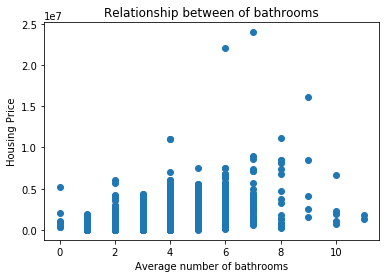

In [105]:
plt.scatter(numdf.BATHRM, numdf.PRICE) 
plt.xlabel("Average number of bathrooms") 
plt.ylabel("Housing Price") 
plt.title("Relationship between of bathrooms") 
plt.show()

In [106]:
lm.predict(X)[0:5]

array([1260486.07183054, 1421528.06661108, 1236953.79266933,
        919583.78983453,  833768.63799146])

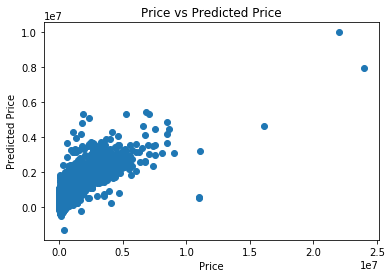

In [107]:
plt.scatter(numdf.PRICE, lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [87]:
#calculate mean squared error
mseFull = np.mean((numdf.PRICE - lm.predict(X)) ** 2)
print(mseFull)

142416630760.26688


## Do not split your train and test data this way

In [21]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


# Randomize train and test data

In [109]:
#test_size default = 0.25
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, numdf.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(19363, 23)
(9537, 23)
(19363,)
(9537,)


In [110]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [111]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 143425619166.40543
Fit a model X_train, and calculate MSE with X_test, Y_test: 144486276789.94193
